# BIOINF 575 Final Project

1. Map/merge the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).
The merged result should have the following columns:

dbSNP_ID, GENE_SYMBOL, DRUG_NAME, PMID, PHENOTYPE_CATEGORY, SIGNIFICANCE, NOTES, SENTENCE, ALLELE_PharmGKB (variant alleles in annotation), ALLELE_23andme (variant alleles in 23andme file)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
_23andme_v5 = pd.read_csv("23andme_v5_hg19_ref.txt", sep="\t", header = None, names = ["CHR", "POS", "dbSNP_ID", "ALLELE_23andme"])

var_drug_ann = pd.read_csv("var_drug_ann.tsv", sep="\t")

#renaming to match the assignment naming conventions
var_drug_ann.rename(columns={
    "Variant/Haplotypes": "dbSNP_ID",
    "Gene": "GENE_SYMBOL",
    "Drug(s)": "DRUG_NAME",
    "Phenotype Category": "PHENOTYPE_CATEGORY",
    "Significance": "SIGNIFICANCE",
    "Notes": "NOTES",
    "Sentence": "SENTENCE",
    "Alleles": "ALLELE_PharmGKB"
}, inplace=True)

#just keeping the columns we need
var_drug_ann = var_drug_ann[[
    "dbSNP_ID",
    "GENE_SYMBOL",
    "DRUG_NAME",
    "PMID",
    "PHENOTYPE_CATEGORY",
    "SIGNIFICANCE",
    "NOTES",
    "SENTENCE",
    "ALLELE_PharmGKB"
]]

merged = pd.merge(var_drug_ann, _23andme_v5[["dbSNP_ID", "ALLELE_23andme"]], on="dbSNP_ID", how="inner")
merged.head()

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs706795,FAIM2,"citalopram, escitalopram, fluoxetine, fluvoxam...",40054571,Efficacy,no,"""We observed nominally significant association...",Allele T is associated with increased response...,T,T
1,rs16918842,OPRK1,heroin,31940240,Dosage,no,No significant difference in allele or genotyp...,Allele T is not associated with dose of heroin...,T,C
2,rs163184,KCNQ1,sitagliptin,39792745,Efficacy,yes,"""KCNQ1 gene polymorphisms also significantly a...",Genotype GG is associated with decreased respo...,GG,T
3,rs7754840,CDKAL1,sitagliptin,39792745,Efficacy,no,"""Patients with the rs7754840 CG genotype showe...",Genotype CG is associated with increased respo...,CG,G
4,rs1799853,CYP2C9,sitagliptin,39792745,Efficacy,yes,"""CYP2C9 gene polymorphisms also significantly ...",Genotype TT is associated with decreased respo...,TT,C


2. Filter the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (PHENOTYPE_CATEGORY is efficacy).

In [5]:
filtered = merged[
    (merged["SIGNIFICANCE"].str.lower() == "yes") &
    (merged["PHENOTYPE_CATEGORY"].str.lower() == "efficacy")
].reset_index(drop=True)
filtered.head()


,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs163184,KCNQ1,sitagliptin,39792745,Efficacy,yes,"""KCNQ1 gene polymorphisms also significantly a...",Genotype GG is associated with decreased respo...,GG,T
1,rs1799853,CYP2C9,sitagliptin,39792745,Efficacy,yes,"""CYP2C9 gene polymorphisms also significantly ...",Genotype TT is associated with decreased respo...,TT,C
2,rs7903146,TCF7L2,exenatide,30700996,Efficacy,yes,"""After treatment with exenatide, only CT/TT in...",Genotypes CT + TT is associated with increased...,CT + TT,C
3,rs8099917,IFNL3,"peginterferon alfa-2a, peginterferon alfa-2b, ...",26075078,Efficacy,yes,A multivariate logistic model showed that the ...,Genotype TT is associated with increased respo...,TT,T
4,rs8099917,IFNL3,"peginterferon alfa-2b, ribavirin",22328925,Efficacy,yes,This genotype is associated with sustained vir...,Genotype TT is associated with increased respo...,TT,T


3) Save the output of the filtering step in a tab-separated file (23andme_PharmGKB_map.tsv) with the following columns:

dbSNP_ID, GENE_SYMBOL, DRUG_NAME, NOTES, SENTENCE, ALLELE_PharmGKB, ALLELE_23andme

In [6]:
### Removing Columns that aren't required in tsv ###
columns_to_drop = ['PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE']
filtered_for_export = filtered.drop(columns=columns_to_drop)


In [ ]:
### write tsv ###
filtered_for_export.to_csv('23andme_PharmGKB_map.tsv', sep='\t', index=False)

4) Create a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data with the following columns:

GENE_SYMBOL, DRUG_NAME, dbSNP_IDs (list of IDs separated by ";")

In [7]:
### Remove Columns that aren't required in tsv ###
summary = filtered[['GENE_SYMBOL', 'DRUG_NAME', 'dbSNP_ID']]

### Summarise dbSNP_ID info###
summarised = (
    summary.groupby(['GENE_SYMBOL', 'DRUG_NAME'], as_index=False)
    .agg(dbSNP_IDs=("dbSNP_ID",lambda x: ";".join(x))))
summarised

,GENE_SYMBOL,DRUG_NAME,dbSNP_IDs
0,ABCA1,"atorvastatin, rosuvastatin, simvastatin",rs2230806
1,ABCA1,fenofibrate,rs2230806;rs2230808;rs2230806
2,ABCB1,antidepressants,rs1128503
3,ABCB1,antipsychotics,rs1128503
4,ABCB1,carbamazepine,rs1128503
...,...,...,...
900,XRCC3,"cisplatin, docetaxel, irinotecan",rs861539
901,XRCC4,"fluorouracil, Platinum compounds, radiotherapy",rs2075685
902,ZNF432,"budesonide, corticosteroids, fluticasone / sal...",rs3752120
903,ZNF697,"interferon beta-1a, interferon beta-1b",rs10494227


In [ ]:
### write tsv ###
summarised.to_csv('23andme_PharmGKB_summary.tsv', sep="\t", index=False)

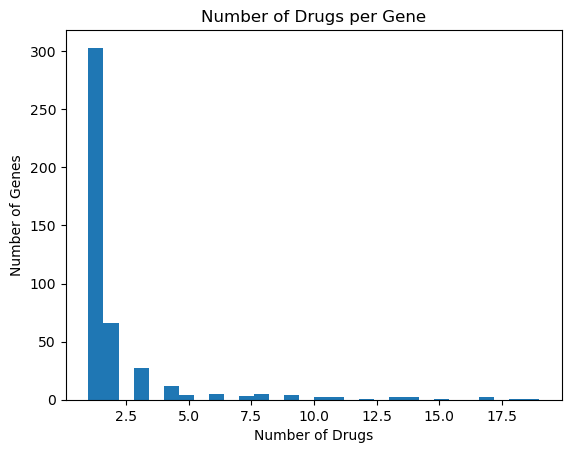

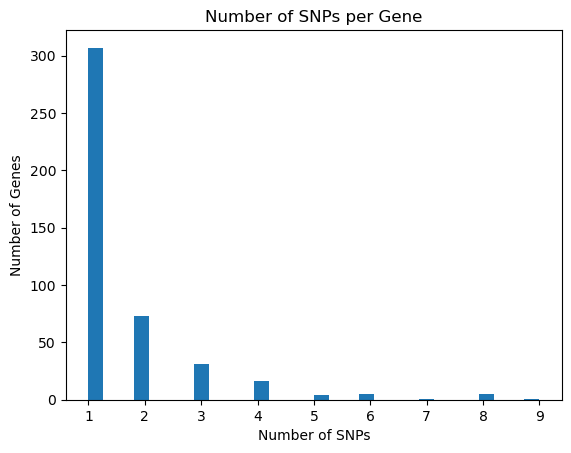

In [8]:
# Drugs per gene
drugs_per_gene = summarised.groupby('GENE_SYMBOL')['DRUG_NAME'].nunique()
plt.figure()
plt.hist(drugs_per_gene, bins=30)
plt.title('Number of Drugs per Gene')
plt.xlabel('Number of Drugs')
plt.ylabel('Number of Genes')
plt.show()

# SNPs per gene
snps_per_gene = summary.groupby('GENE_SYMBOL')['dbSNP_ID'].nunique()
plt.figure()
plt.hist(snps_per_gene, bins=30)
plt.title('Number of SNPs per Gene')
plt.xlabel('Number of SNPs')
plt.ylabel('Number of Genes')
plt.show()

6_1. Adrian's New Feature-Build a function to input a drug and a patient vcf, then screen for any variants that would affect the perscription of that drug by a clinician

In [23]:
def okay_to_prescribe(patient_vcf_file, drug):
    if not isinstance(patient_vcf_file, str):
        raise TypeError("patient_vcf_file must be a string.")
    if not patient_vcf_file.endswith(".txt"):
        raise ValueError("patient_vcf_file must be a .txt file")
    if not isinstance(drug, str):
        raise TypeError("drug must be a string.")

    patient_variants = pd.read_csv(patient_vcf_file, sep="\t", header=None, names=["CHR", "POS", "dbSNP_ID", "ALLELE_23andme"])

    var_drug_ann = pd.read_csv("var_drug_ann.tsv", sep="\t")

    var_drug_ann.rename(columns={
        "Variant/Haplotypes": "dbSNP_ID",
        "Gene": "GENE_SYMBOL",
        "Drug(s)": "DRUG_NAME",
        "Phenotype Category": "PHENOTYPE_CATEGORY",
        "Significance": "SIGNIFICANCE",
        "Notes": "NOTES",
        "Sentence": "SENTENCE",
        "Alleles": "ALLELE_PharmGKB"
    }, inplace=True)

    var_drug_ann = var_drug_ann[[
        "dbSNP_ID",
        "GENE_SYMBOL",
        "DRUG_NAME",
        "PMID",
        "PHENOTYPE_CATEGORY",
        "SIGNIFICANCE",
        "NOTES",
        "SENTENCE",
        "ALLELE_PharmGKB"
    ]]

    merged = pd.merge(var_drug_ann, patient_variants[["dbSNP_ID", "ALLELE_23andme"]], on="dbSNP_ID", how="inner")
    # Some rows have multiple drugs 
    drug = drug.lower()
    merged = merged[merged["DRUG_NAME"].str.lower().str.contains(drug)]

    filtered = merged[
        (merged["SIGNIFICANCE"].str.lower() == "yes") &
        (merged["PHENOTYPE_CATEGORY"].str.lower().isin(["efficacy", "toxicity", "dosage"]))
    ].reset_index(drop=True)

    if filtered.empty:
        print("This drug is okay to prescribe.")
    else:
        print("Variants affecting prescription were found:")
        return filtered

In [24]:
okay_to_prescribe("test_patient_file.txt", "fluorouracil")

Variants affecting prescription were found:


,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs2075685,XRCC4,"fluorouracil, Platinum compounds, radiotherapy",28796378,Efficacy,yes,"1,002 patients with gastric cancer and complet...",Allele T is associated with decreased response...,T,G


In [25]:
okay_to_prescribe("test_patient_file.txt", "buproprion")

This drug is okay to prescribe.
